Brett D. Grell
DA 320
Midterm: MongoDB Notebooks
11/08/2022

# Introduction
People have always been interested in a good story and conflict is essential to telling a good story. Movies have elevated the art of storytelling to an extraordinary level. The thematic concept of Good versus Evil is one that is old and powerful. This archetype is so captivating of our imagination that multiple synonyms exist to describe both forces.  The variation in a movies description caught my attention. 

Would variations in description dramatically alter the results found in the Metacritic dataset? 

In [18]:
# First we will set up our program and retrieve our dataset.

import json
import pymongo
import certifi
import pandas

# Retreive access credentials for MongoDB
with open('C:\\Users\\brett\\Documents\\GitHub\\metacritic-movies-project\\secrets.json') as f:
    data = json.load(f)
    secret_key = data['mongodb']

# Fetch required database
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())
my_database = client['DA_320_Movies']
metacritic_data = my_database['Metacritic']
metacritic = pandas.DataFrame(metacritic_data.find())

In [19]:
# Data has been acquired and we need to do a little data cleansing

# convert release dates into dates and gather year/month
metacritic.release_date = pandas.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic["month"] = metacritic.release_date.dt.month
metacritic.metascore = pandas.to_numeric(metacritic.metascore)
metacritic.head()

,_id,title,release_date,description,metascore,image_url,year,month
0,636b0b3f7aa16b8f278ef044,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6
1,636b0b3f7aa16b8f278ef048,You Can Count on Me,2000-11-10,A young mother (Laura Linney) is cheating on h...,85,https://static.metacritic.com/images/products/...,2000,11
2,636b0b3f7aa16b8f278ef04b,Calle 54,2000-10-20,This documentary features a behind-the-scenes ...,84,https://static.metacritic.com/images/products/...,2000,10
3,636b0b3f7aa16b8f278ef052,Gimme Shelter (re-release),2000-08-11,This re-release of the 1970 classic documentar...,80,https://static.metacritic.com/images/products/...,2000,8
4,636b0b3f7aa16b8f278ef056,Chunhyangdyun,2000-12-29,"Set in 18th century Korea, this story of young...",79,https://static.metacritic.com/images/products/...,2000,12


First we will start with some basic visualizations. The purpose of the following charts is basic exploration of the data collected by the Metacritic_Scrapper earlier.

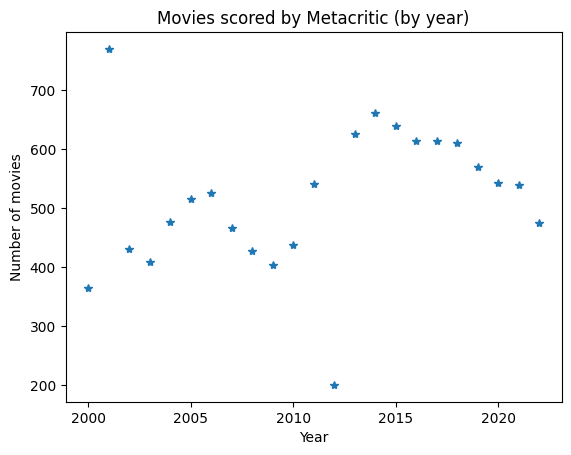

In [20]:
from matplotlib import pyplot
from matplotlib.ticker import FormatStrFormatter

# Set up Title and label axis

pyplot.title('Movies scored by Metacritic (by year)')
pyplot.xlabel('Year')
pyplot.ylabel('Number of movies')

df = metacritic['release_date'].groupby(metacritic.year).agg('count')
pyplot.plot(df, '*')
pyplot.show()

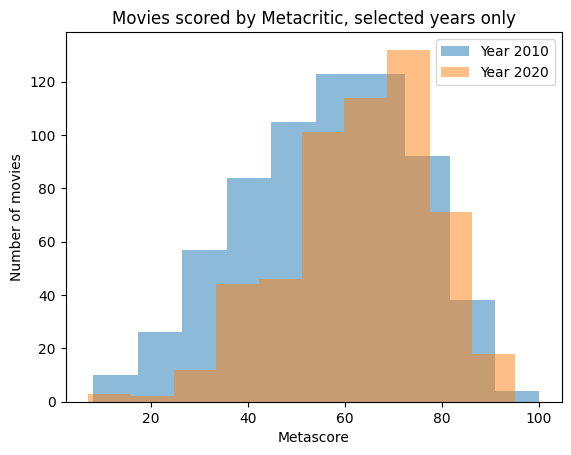

In [21]:
# Retreive metascore for two different years
scores_2010 = metacritic[metacritic['year'] == 2014].metascore
scores_2020 = metacritic[metacritic['year'] == 2020].metascore

# Pour (plot) into buckets

pyplot.title("Movies scored by Metacritic, selected years only")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of movies')
pyplot.hist(scores_2010, alpha=0.5, label='Year 2010')
pyplot.hist(scores_2020, alpha=0.5, label='Year 2020')
pyplot.legend(loc='upper right')
pyplot.show()

The Movies scored by Metacritic (by year) scatterplot had two interesting outliers of note. The year 2001 shows an outlier for number of movies scored that is well above anything else on the chart. The year 2012 shows an outlier well below any other year in the visualization. These outliers could be flawed data or created by extrenal stimuli such as a labor strike or other industrial concerns.

The exploration of synonyms is done through the use of keywords. Below I start with the "bright" and "dystopian" as the keywords. This pair is both specific and modern which should yield some interesting results. As we iterate through synonymns the search terms become broader until we finally land on "good" and "evil".

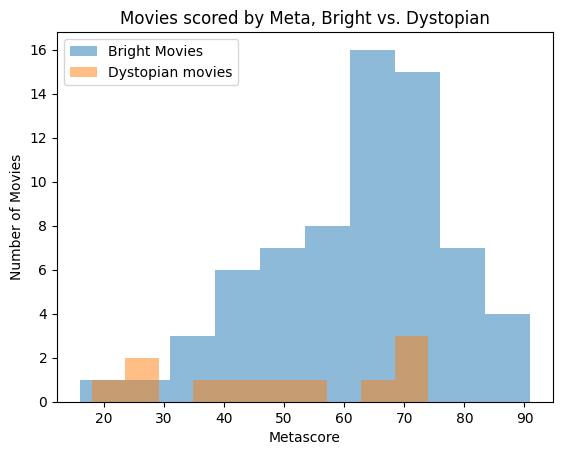

In [32]:
# define new search criteria for data set
scores_bright = metacritic[metacritic['description'].str.contains("bright")].metascore
scores_dystopian = metacritic[metacritic['description'].str.contains("dystopian")].metascore

# Pour into buckets

pyplot.title("Movies scored by Meta, Bright vs. Dystopian")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of Movies')
pyplot.hist(scores_bright, alpha=0.5, label="Bright Movies")
pyplot.hist(scores_dystopian, alpha=0.5, label="Dystopian movies")
pyplot.legend(loc='upper left')
pyplot.show()

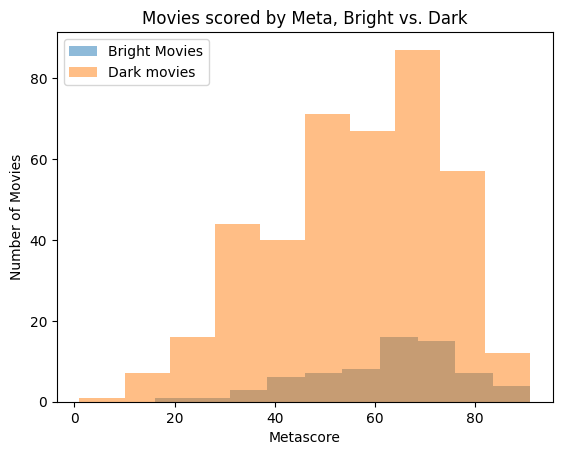

In [31]:
# define new search criteria for data set
scores_bright = metacritic[metacritic['description'].str.contains("bright")].metascore
scores_dark = metacritic[metacritic['description'].str.contains("dark")].metascore

# Pour into buckets

pyplot.title("Movies scored by Meta, Bright vs. Dark")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of Movies')
pyplot.hist(scores_bright, alpha=0.5, label="Bright Movies")
pyplot.hist(scores_dark, alpha=0.5, label="Dark movies")
pyplot.legend(loc='upper left')
pyplot.show()

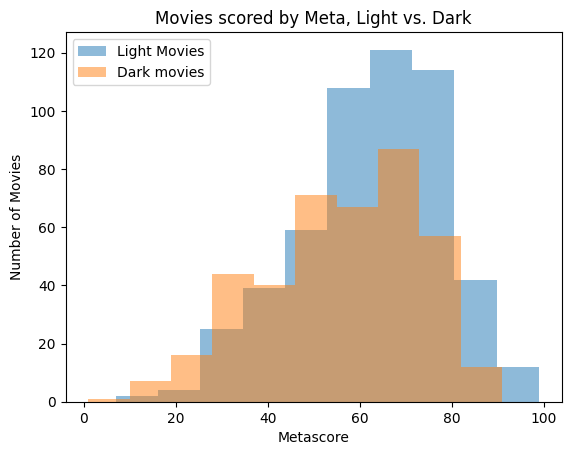

In [30]:
# define new search criteria for data set
scores_light = metacritic[metacritic['description'].str.contains("light")].metascore
scores_dark = metacritic[metacritic['description'].str.contains("dark")].metascore

# Pour into buckets

pyplot.title("Movies scored by Meta, Light vs. Dark")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of Movies')
pyplot.hist(scores_light, alpha=0.5, label="Light Movies")
pyplot.hist(scores_dark, alpha=0.5, label="Dark movies")
pyplot.legend(loc='upper left')
pyplot.show()

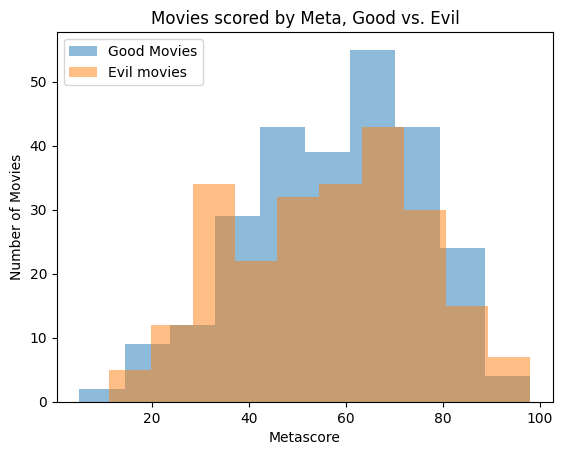

In [29]:
# define new search criteria for data set
scores_good = metacritic[metacritic['description'].str.contains("good")].metascore
scores_evil = metacritic[metacritic['description'].str.contains("evil")].metascore

# Pour into buckets

pyplot.title("Movies scored by Meta, Good vs. Evil")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of Movies')
pyplot.hist(scores_good, alpha=0.5, label="Good Movies")
pyplot.hist(scores_evil, alpha=0.5, label="Evil movies")
pyplot.legend(loc='upper left')
pyplot.show()

# Conclusion:
The histograms created showed some interesting changes on each keyword difference. It’s impressive to see how impactful a keyword change can be.  The initial “Bright vs. Dystopian” chart shows  a large disparity between the two terms.  As a keyword, “dystopian” returned few results.  This is probably due to the specificity of the word.  The results shift dramatically in the “Bright vs. Dark” histogram. Bright was kept as a reference point. Using Dark in place of Dystopian significantly shifted the results set as Dark dominates Bright. Next, “Light vs. Dark” sees the keyword change again shift significantly back. Both keywords returned much larger numbers with Light having the higher count. The result set for the “Good vs. Evil” chart was also interesting. Good and Evil were the broadest keywords used. The most basic description of this theme resulted in a much lower number of results than the previous chart.

Subtle shifts in keywords can cause dramatic shifts in the result sets that are returned to us. Descriptive language is subjective and often used. There are many ways to describe the same concepts. The use of different words to describe these concepts in movie descriptions has returned significantly different results.  Interesting trends abound within the data and this data set is ripe for further exploration.
